# GOFevaluation Tutorial
Robert Hammann, Tim Wolf  
October 2021

The GOFevaluation package comprises the possibility to perform different 1D / nD, binned / two-sample (unbinned) GOF tests. The following tests are currently implemented:

| GoF measure                   | Class                     |    data input   | reference input | dim |
|-------------------------------|---------------------------|:---------------:|:---------------:|:---:|
| Kolmogorov-Smirnov            | `KSTestGOF`               |      sample     |      binned     |  1D |
| Two-Sample Kolmogorov-Smirnov | `KSTestTwoSampleGOF`      |      sample     |      sample     |  1D |
| Two-Sample Anderson-Darling   | `ADTestTwoSampleGOF`      |      sample     |      sample     |  1D |
| Poisson Chi2                  | `BinnedPoissonChi2GOF`    | binned / sample |      binned     |  nD |
| Chi2                          | `BinnedChi2GOF`           | binned / sample |      binned     |  nD |
| Point-to-point                | `PointToPointGOF`         |      sample     |      sample     |  nD |

Each test is implemented as a class, in the following we call instances of a class `gof_object`. Depending on whether you want to perform a binned or unbinned test and whether your data and references are in binned or unbinned format, there are several ways to initialize a `gof_object` (discussed in Ch.1).  
You can also perform multiple GOF tests in parallel with a wrapper class (discussed in Ch.2).

In [11]:
import GOFevaluation as ge
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

## 0. Generate some fake data for this tutorial

In [ ]:
# data sample:
n_data_sample = 100 # number of events per data sample

data_model = sps.norm()
data_sample = data_model.rvs(size=n_data_sample)

# reference samples:
n_reference_sample = 10 * n_data_sample

ref_model = data_model
reference_sample = ref_model.rvs(size=n_reference_sample)

# binning:
bin_edges = np.linspace(-2.5, 2.5, 11)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

binned_data, _ = np.histogram(data_sample, bins=bin_edges)

# expectations:
n_expectations = n_data_sample

pdf = ref_model.pdf(bin_centers)
pdf /= np.sum(pdf)
expectations = pdf * n_expectations

In [15]:
# Generate toy data sample and reference sample
reference_sample = sps.norm().rvs([125*100, 2], random_state=42)
reference_sample.T[1] += reference_sample.T[0]

data_sample = sps.norm().rvs([125, 2], random_state=43)
data_sample.T[1] += data_sample.T[0]

# Bin Data & Reference
binned_reference, bin_edges = np.histogramdd(reference_sample, bins=(5, 5))
binned_data, _ = np.histogramdd(data_sample, bins=bin_edges)

Let's have a look at the data!

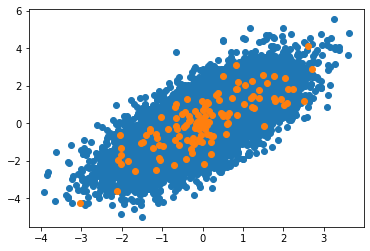

In [9]:
plt.scatter(reference_sample.T[0], reference_sample.T[1])
plt.scatter(data_sample.T[0], data_sample.T[1])
plt.show()

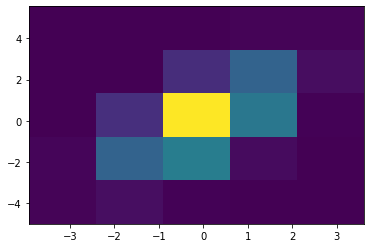

In [18]:
plt.hist2d(reference_sample.T[0], reference_sample.T[1], bins=bin_edges)
plt.show()

## 1. Make a simple GOF test

### 1.1 Unbinned GOF test

### 1.2 Binned GOF test

In [ ]:
# Data Sample + Binned PDF
gof_object = ge.BinnedPoissonChi2GOF(data_sample, pdf, bin_edges, nevents_expected)

# Binned Data + Binned PDF
gof_object = ge.BinnedPoissonChi2GOF.from_binned(binned_data, binned_reference)

# Data Sample + Reference Sample
gof_object = ge.PointToPointGOF(data_sample, reference_sample)

In [ ]:
# define eqpb parameters
order = [0, 1]
n_partitions = [5, 5]

gof_object = ge.BinnedPoissonChi2GOF.bin_equiprobable(data_sample=data_sample,
                                                      reference_sample=reference_sample,
                                                      nevents_expected=125,
                                                      n_partitions=n_partitions,
                                                      order=order,
                                                      plot=True,
                                                     )
ax = plt.gca()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

## 2. Perform multiple GOF tests at once

In [ ]:
# Initialise all two-sample GoF measures:
gof_object = ge.GOFTest(data_sample=data_sample, 
                        reference_sample=reference_sample,
                        gof_list=['ADTestTwoSampleGOF', 
                                  'KSTestTwoSampleGOF', 
                                  'PointToPointGOF'])

In [ ]:
# Calculate GoFs and p-values:
d_min = 0.01
gof_object.get_gofs(d_min=d_min)
# OUTPUT:
# OrderedDict([('ADTestTwoSampleGOF', 1.6301454042304904),
#              ('KSTestTwoSampleGOF', 0.14),
#              ('PointToPointGOF', 0.00048491049630050576)])

gof_object.get_pvalues(d_min=d_min)
# OUTPUT:
# OrderedDict([('ADTestTwoSampleGOF', 0.08699999999999997),
#              ('KSTestTwoSampleGOF', 0.10699999999999998),
#              ('PointToPointGOF', 0.14300000000000002)])

# Re-calculate p-value only for one measure:
gof_object.get_pvalues(d_min=.3, gof_list=['PointToPointGOF'])
# OUTPUT:
# OrderedDict([('ADTestTwoSampleGOF', 0.08699999999999997),
#              ('KSTestTwoSampleGOF', 0.10699999999999998),
#              ('PointToPointGOF', 0.03400000000000003)])

print(gof_object)